In [3]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import random
import math
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Задание 6

Иван решил проехать из города А в город Б по дороге длиной 800 км на
необычном транспортном средстве (далее ТС), движение которого зависит от результатов
бросков игральной кости. Условия одного шага передвижения следующие:
- если при броске кости выпадает 1 и 2, то ТС везет Ивана на 5 км вперед;
- если выпадает 3 или 4, то ТС возвращает Ивана на 5 км назад, но не дальше города
А;
- если выпадает 5 или 6, то Иван бросает кость повторно и ТС провозит Ивана вперед
на расстояние (в км), равное произведению выпавшего числа очков на пять.
При достижении города Б ТС Ивана останавливается.

1) Путем компьютерного моделирования получите историю передвижения Ивана за
140 шагов и визуализируйте ее (постройте график зависимости удаленности Ивана от
города А от номера шага). Повторите моделирование многократно, используя для
визуализации одну систему координат.
2) Рассмотрите случайную величину X – расстояние, на которое Иван удалился от
города за 80 шагов. Основываясь на результатах компьютерного моделирования,
сформулируйте гипотезы о законе ее распределения и проверьте их. Оцените вероятность,
что за 110 шагов Иван доберется до города Б.
3) Постройте доверительные интервалы для математического ожидания и дисперсии
случайной величины X.

### ***Пункт 1***

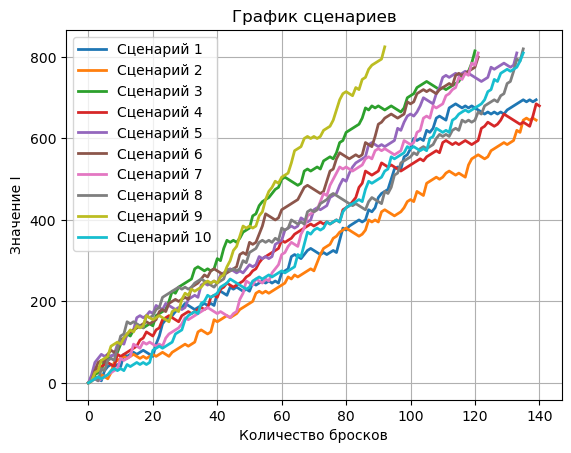

In [4]:
def Ivan(N):
    I = [0]
    a = [1, 2, 3, 4, 5, 6]  # 1 - позитивный сценарий, 0 - негативный сценарий
    x = 1
    p = [1/6] * 6  # Вероятности для каждого сценария

    for i in range(N):
        x_n = np.random.choice(a, x, True, p)

        # Проверяем, что длина списка больше 1 перед доступом к I[-1]
        if I[-1] >= 800:
            break

        match x_n[0]:  # Используем x_n[0] для получения значения
            case 1 | 2:
                I.append(I[-1] + 5)
            case 3 | 4:
                if I[-1] > 5:
                    I.append(I[-1] - 5)
            case 5 | 6:
                I.append(I[-1] + np.random.choice(a, x, True, p)[0] * 5)

    return I  # Возвращаем список I

# Список для хранения всех кривых
all_curves = []

# Вызов функции несколько раз и сохранение результатов
for _ in range(10):
    curve = Ivan(140)
    all_curves.append(curve)

# Построение графика
plt.figure()
for curve in all_curves:
    plt.plot(range(len(curve)), curve, lw=2)  # Отображаем каждую кривую

plt.title("График сценариев")
plt.grid(True)
plt.xlabel("Количество бросков")
plt.ylabel("Значение I")
plt.legend([f'Сценарий {i+1}' for i in range(len(all_curves))])  # Легенда для каждого сценария
plt.show()  # Отображение графика

### ***Пункт 2***

79.092


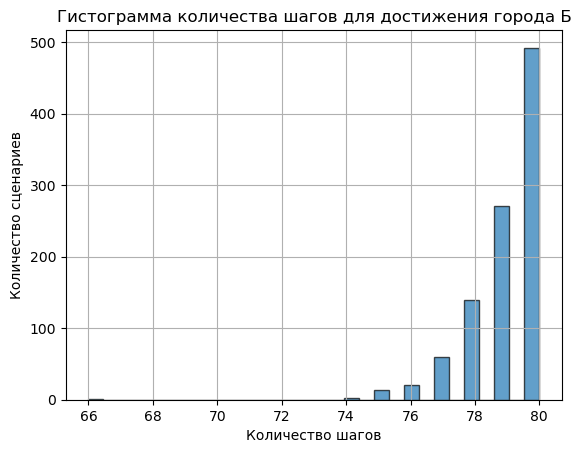

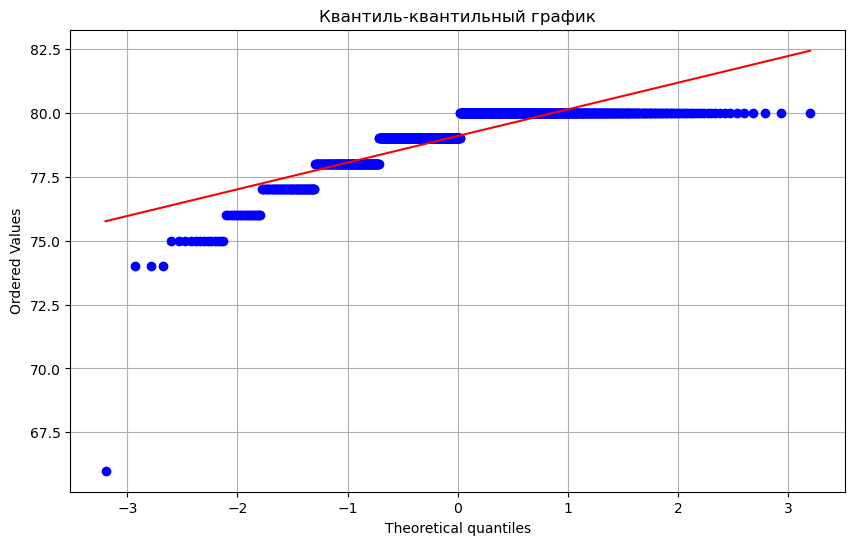

Статистика теста Шапиро-Уилка: 0.725551187992096, p-значение: 1.3188391122435618e-37
Вероятность достижения города Б за 110 шагов: 0.0860
[80, 80, 79, 79, 80, 79, 80, 79, 74, 80, 80, 79, 79, 79, 80, 79, 80, 80, 80, 80, 79, 78, 80, 78, 79, 80, 79, 80, 78, 79, 79, 80, 79, 77, 79, 80, 79, 79, 80, 80, 77, 80, 80, 79, 80, 80, 79, 78, 78, 77, 79, 79, 80, 78, 80, 80, 76, 79, 78, 80, 80, 80, 80, 80, 78, 79, 79, 80, 80, 80, 80, 79, 79, 79, 78, 77, 79, 80, 80, 80, 80, 77, 78, 80, 80, 80, 80, 78, 80, 80, 79, 79, 80, 80, 78, 77, 80, 78, 80, 80, 77, 80, 80, 80, 78, 80, 80, 79, 80, 79, 80, 79, 80, 78, 80, 79, 79, 78, 80, 78, 79, 79, 80, 79, 79, 80, 80, 79, 78, 78, 80, 80, 77, 79, 80, 79, 80, 79, 80, 78, 77, 79, 78, 76, 80, 80, 79, 78, 80, 80, 80, 79, 74, 79, 78, 80, 80, 80, 79, 80, 80, 80, 78, 80, 78, 79, 79, 78, 80, 80, 78, 79, 79, 75, 80, 79, 79, 80, 80, 80, 80, 80, 78, 80, 77, 76, 77, 77, 79, 80, 80, 80, 79, 80, 80, 80, 79, 78, 80, 80, 80, 80, 77, 80, 78, 80, 80, 77, 80, 80, 78, 79, 79, 80, 79, 7

In [5]:
# Список для хранения количества шагов
steps_to_reach_B = []

# Моделирование многократных сценариев
num_simulations = 1000
for _ in range(num_simulations):
    a = Ivan(80)
    steps = len(a) -1  # Получаем количество шагов для достижения города Б
    steps_to_reach_B.append(steps)

print(np.mean(steps_to_reach_B))

# Построение гистограммы
plt.hist(steps_to_reach_B, bins=30, edgecolor='black', alpha=0.7)
plt.title('Гистограмма количества шагов для достижения города Б')
plt.xlabel('Количество шагов')
plt.ylabel('Количество сценариев')
plt.grid(True)
plt.show()

# Квантиль-квантильный график
plt.figure(figsize=(10, 6))
sts.probplot(steps_to_reach_B, dist="norm", plot=plt)
plt.title('Квантиль-квантильный график')
plt.grid(True)
plt.show()

# Тест Шапиро-Уилка на нормальность
shapiro_test = sts.shapiro(steps_to_reach_B)
print(f'Статистика теста Шапиро-Уилка: {shapiro_test.statistic}, p-значение: {shapiro_test.pvalue}')

# Оценка вероятности достижения города Б за 110 шагов
Steps = []

num_simulations = 1000
for _ in range(num_simulations):
    a = Ivan(300)# Видно, что мы упираемся в значение 80 и нужно взять больше шагов
                 # это позволит нам более точно определить искомую вероятность
    steps = len(a)  # Получаем количество шагов для достижения города Б
    Steps.append(steps)

successful_arrivals = sum(1 for steps in Steps if steps <= 110)
probability_of_arrival = successful_arrivals / num_simulations
print(f'Вероятность достижения города Б за 110 шагов: {probability_of_arrival:.4f}')

print(steps_to_reach_B)


### ***По тесту Шапиро-Уилка и графику q-q видно, что это точно не нормальное распределение, а гистограмма очень похожа на обратное эксподенциальное***

### ***Пункт 3***

Так как распределение не нормальное, то используем bootstrap 

In [6]:
random = np.random.default_rng()

# Создаем доверительные интервалы для дисперсии и математического ожидания с помощью бутстрепа
disp = sts.bootstrap((steps_to_reach_B,), np.std, axis=-1, confidence_level=0.95, random_state=random) # Для дисперс
mat = sts.bootstrap((steps_to_reach_B,), np.mean, axis=-1, confidence_level=0.95, random_state=random) # Для мат. ож
# Получаем границы доверительных интервалов
disp1, disp2 = disp.confidence_interval # Для дисперсии
mat1, mat2 = mat.confidence_interval # Для математического ожидания

print(f'Доверительный интервал для математического ожидания при β = 0.95 : ({mat1} < m < {mat2})')
print(f'Доверительный интервал для Дисперсии при β = 0.95 : ({disp1} < σ\u00B2 < {disp2})')

Доверительный интервал для математического ожидания при β = 0.95 : (79.01 < m < 79.163)
Доверительный интервал для Дисперсии при β = 0.95 : (1.1227661241697684 < σ² < 1.479930946541005)


Ред. Кудреватых Павел, ПМ-31.

## Лекция 1. Уравнения математической физики

### Тема:  "Общие представления о дифференциальных уравнениях в частных производных. Понятие о совокупности решений. Некоторые методы интегрирования"

"Разум, которому в каждый определённый момент времени были бы известны все силы, приводящие природу в движение, и положение всех тел, из которых она состоит, будь он также достаточно обширен, чтобы подвергнуть эти данные анализу, смог бы объять единым законом движение величайших тел Вселенной и мельчайшего атома…" — Пьер Симон Лаплас, "Опыт философии теории вероятностей", 1816 год.

#### Введение. Дифференциальные уравнения

​	**Дифференциальное уравнение** — равенство, задающее зависимость между функцией, ее производными и параметром (независимой переменной) этой функции.

​	Простейшим видом дифференциального уравнения является прямолинейное движение. Формула для координаты точки, двигающейся линейно, будет выглядеть следующим образом:
$$
x(t) = \frac{\partial  x}{\partial  t}t + s_0 =  \dot{x} t + s_0,
$$
где $t$ — независимая переменная, $x(t)$ — искомая функция, а $\dot x$ — производная функции по этой переменной. Как видно, задавая разное значение времени можно узнать состояние системы (координаты точки) в любой момент. Если точка двигается ускоренно, то уравнение примет немного другой известный из школьного курса физики вид:
$$
x(t) =    \ddot{x} \frac{t^2}{2} +\dot{x} t + s_0.
$$
​	Может показаться, что такие уравнения не нужны, можно вычислить ускорение и скорость и записать формулу без дифференциальных операторов. Дело в том, что значения ускорения и скорости необязательно будут константами. Они могут быть функциями от времени:
$$
   \begin{cases}
      x(t) =    \ddot{x} \dfrac{t^2}{2} +\dot{x} t + s_0 \\
   \dot x = g(t) \\
      \ddot x = m(t) = \dot g(t)
      \end{cases}
$$
   Перед нами более сложная система, не имеющая уже аналитического решения в общем виде (об этом позже). Уравнение можно переписать немного иначе:
$$
x(g,t) = \dot g \frac{t^2}{2} + gt + s_0.
$$
​	Получается, что пройденный путь зависит от еще одной переменной. В нашем случае, она является **зависимой**, то есть зависит от переменной $t$, но это необязательно. Например, скорость автомобиля необязательно зависит от времени: она может зависеть от человеческого фактора, превращая скорость в еще одну переменную. Таким образом, мы плавно перешли к *частным производным*.

​	**Частная производная** - предел отношения приращения функции к приращению одного из ее независимых переменных:
$$
f'_{x_n} = \lim_{\delta x \to 0}
\frac{f(x_1,...,x_n+\delta x,...,x_m) - f(x_1,...,x_n,...,x_m) }
{\delta x}.
$$
​	Частная производная обладает следующими свойствами:

* Частная производная второго порядка является производной от частной производной первого порядка (по аналогии с обычной производной):
  $$
  \left( f'_{x_n} \right)'_{x_n} = f''_{x_n};
  $$

* Частная производная может иметь частные производные по другим переменным, тогда она называется "смешанной":
  $$
  \left( f'_{x_n} \right)'_{x_m} = f''_{x_n,x_m}.
  $$

​	В физических процессах почти никогда не бывает ситуации, когда искомый параметр зависит только от одной переменной: даже в контролируемых экспериментах присутствует множество неизвестных, скрытых факторов. Таким образом, почти все физические процессы представляют собой *дифференциальные уравнения в частных производных*.

#### Дифференциальные уравнения в частных производных

​	**Дифференциальные уравнения в частных производных** (далее ДУЧП) — равенство, задающее зависимость между функцией и ее частными производными различных порядков.

​	Иными словами, в наиболее общем виде ДУЧП относительно неизвестной функции $U$ представляется формулой:
$$
F\left(x_1,...,x_n,U,U'_{x_1},...,U'_{x_n},...,U^{s}_{x_1},..., U^{s}_{x_n}\right) = 0,
$$
где $F$ — заданная функция, имеющая в качестве аргументов независимые переменные $x_1, x_2, . . . , x_n$, неизвестную функцию $U$ и ее частные производные. При этом, число $s$, обозначающее порядок старшей производной, входящей в уравнение, называется порядком ДУЧП.	

​	Решением ДУЧП называется функция $U(x_1, x_2, ... , x_n)$, которая при подстановке в $F$ превращает ДУЧП в тождество хотя бы в некоторой области $D \subset R_n$. Область $D$ в этом случае называется областью существования решения.

​	Простейшим является *линейное ДУЧП*, то есть уравнение, где функция $F$ линейна по аргументам $U,U'_{x_1},...,U'_{x_n},...,U^{s}_{x_1},..., U^{s}_{x_n}$, а коэффициенты зависят только от $x_1, x_2, ..., x_n$. 

​    Линейной уравнение первого порядка для неизвестной функции двух переменных имеет вид:
$$
a(x,y)U'_x + b(x,y)U'_y + c(x,y)U + d(x,y) = 0.
$$

​	Если функция $F$ линейна лишь относительно производных высшего порядка $r$, с коэффициентами, которые могут зависеть не только от $x_1, x_2, ..., x_n$, но и от функции $U$ и ее частных производных вплоть до порядка $r − 1$, то ДУЧП называется *квазилинейным*.

​	Если независимые переменные считать координатами точки на плоскости $xOy$, а значения функции $U(x, y)$ откладывать по оси $z$, перпендикулярной к этой плоскости, то решение ДУЧП $z = U(x, y)$ можно интерпретировать как поверхность в трехмерном пространстве. Такая поверхность представляет собой *интегральную поверхность*. Пример интегральной поверхности приведен в *примере 1.1*.

#### Совокупность решений и Метод интегрирования

​	Если не заданы точки $(x,y)$, через которые обязано проходить решение ДУЧП, как правило, можно говорить о бесконечном количестве решений. Совокупность всех решений называется *общим решением* — решение, содержащее произвольные элементы. Изменение таких элементов порождает множество функций, удовлетворяющих данному уравнению. В простом случае решение можно найти методом интегрирования и кратного интегрирования.

​	Приведем некоторые простые примеры ДУЧП для неизвестной функции двух переменных $U(x,y)$.

​	**Пример 1.1**:
$$
U_y = 0.
$$
​	Как видно, искомая функция не зависит от $y$ и любая функция, зависящая только от $x$, будет его решением:
$$
U(x,y) = \omega(X).
$$

![1](%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%201%20+%20%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%201.assets/1.svg)

**Пример 1.2**:
$$
U_x = f(x).
$$
​	Данное неоднородное уравнение имеет следующее решение:
$$
U(x,y) = \int\limits_{x_0}^x f(\xi)\, \mathrm{d}\xi + v(y),
$$
где $x_0$ — произвольное фиксированное число из области определения функции $U$, а $v(y)$ — зависящая только от $y$ произвольная функция.

​	**Пример 1.3**:
$$
U_{xy} = 0.
$$
​	Перепишем в другом виде:
$$
\frac{\partial }{\partial y} U_x = 0.
$$
​	Считая $U_x$ неизвестной функцией, по аналогии с первым и вторым примерами получаем:
$$
U_x = \omega_1(x),\\
U = \omega(x) + v(y),
$$
где $\omega(x), \omega_1(x)$ и $v(y)$ — произвольные функции одной переменной, $\omega(x) = \int\limits_{x_0}^x \omega_1(\xi)\, \mathrm{d}\xi$.

​	**Пример 1.4** :
$$
U(x,y) = W(xy).
$$

​	Используя правило дифференцирования сложных функций, находим:
$$
U_x = y\omega',\ U_y = x\omega',
$$
где $\omega' = \dfrac{\mathrm{d} \omega}{\mathrm{d} \xi}|_{ξ=xy}$. Исключая $\omega'$, получаем линейное однородное ДУЧП первого порядка для данного семейства функций:
$$
xU_x - yU_y = 0.
$$

## Семинар 1. Уравнения математической физики

### Тема "Обыкновенные ДУ и ДУЧП. Примеры решений, фазовое пространство, задача маятника"

#### Некоторые приемы интегрирования на примере функции двух переменных $U(x,y)$

- **Замена переменных**

  ​    Можно упростить ДУЧП переходом к новым независимым переменным с условием отличия от нуля якобиана преобразования:
  $$
  \begin{bmatrix}
  \xi_x & \eta_x
  \\
  \xi_y & \eta_y
  \end{bmatrix} \neq 0;
  $$

  $$
  \xi = \xi(x,y),\ \eta = \eta(x,y);\\
  x = x(\xi,\eta),\ y = y(\xi,\eta).
  $$

  ​    Получаем:
  $$
  U(x,y) =  \tilde U(\xi(x,y),\eta(x,y)),\\
  U_x = \tilde U_\xi \frac{\partial\xi}{\partial x} + \tilde U_\eta \frac{\partial\eta}{\partial x},\\
  U_y = \tilde U_\xi \frac{\partial\xi}{\partial y} + \tilde U_\eta \frac{\partial\eta}{\partial y}.
  $$
  **Пример 2.1**:
  $$
  U_x = U_y.
  $$
  ​    Проведем замену:
  $$
  \xi = x + y,\ \eta = x - y;\\
  x = \frac{\xi + \eta}{2},\ y = \frac{\xi - \eta}{2}.
  $$
  ​    Получаем преобразованное уравнение:
  $$
  2\tilde U_\eta = 0.
  $$
  ​    Общее решение такого уравнение приведено в *примере 1.1*. Перейдем к $x$ и $y$:
  $$
  U(x,y) = \omega(x+y).
  $$
  **Пример 2.2**:
  $$
  U_{xx} = U_{yy}.
  $$
  ​    С аналогичной заменной переменных, что и в *примере 2.1*, получаем:
  $$
  4\tilde U_{\xi\eta} = 0.
  $$
  ​    Общее решение такого уравнение приведено в *примере 1.3*. Перейдем к $x$ и $y$:
  $$
  U(x,y) = \omega(x+y) + v(x-y).
  $$

- **Разделение переменных**

  **Пример 2.3**:
  $$
  U_x^2 + U_y^2 = 1.
  $$
  ​    Найдем решение в виде $U(x,y) = \varphi(x) + \psi(y)$. Подставим это выражение и перепишем его:
  $$
  [\varphi'(x)]^2 = 1 - [\psi'(y)]^2.
  $$
  ​    Так как тождественно равны функции в левой части этого уравнения стоит функция, которая зависит от $x$, и в правой части уравнения, зависящей от $y$, то левая и правая части уравнения равны некоторой константе:
  $$
  [\varphi'(x)]^2 = \lambda, \  1 - [\psi'(y)]^2 = \lambda.
  $$
  ​    Ввиду неотрицательности константы разделения $\lambda$ ($0 \le \lambda \le 1 $) положим $\lambda = \alpha^2$.
  $$
  \varphi(x) = \alpha x + C_1,\ \psi(y) = \pm \sqrt{1-\alpha^2}y + C_2.
  $$
  ​    Получаем семейство решений уравнения
  $$
  U(x,y) = \alpha x \pm \sqrt{1-\alpha^2}y + C,\ (|\alpha| \le 1).
  $$

#### Принципиальная сложность решений ДУЧП

* **Маятник**

![2](%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%201%20+%20%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%201.assets/2.gif)

   ​    В школе вы изучали гармонические колебания математического маятника:
$$
   \theta(t) = \theta_0\cos(\sqrt{\frac{g}{L}}t).
$$
   ​    Однако, эта формула является лишь приближением, работающим в области малых углов. При больших углах колебания прекращают подчинятся закону косинуса. 

   ​    Обозначив длину кривой, которую описывает маятник, за $x$, составим дифференциальное уравнение. Ускорение $a = \ddot x = -g \sin(\theta)$. Так как нам известно, что $x = L\theta$, то получим:
$$
\ddot x = L\ddot\theta,\\
   \ddot \theta = -\frac{g}{L}\sin(\theta).
$$
   ​    Примем в расчет сопротивление воздуха, пропорциональное скорости:
$$
   \ddot \theta = -\frac{g}{L}\sin(\theta) - \mu\dot\theta,
$$
   где $\mu$ — константа, выражающее сопротивление воздуха.

   ​    Даже если мы уберем элемент затухания, то аналитическое решение можно записать в виде непростых интегралов и обратных интегральных задач:
$$
   \theta(t) = 2am\left(\frac{\sqrt{2g + Lc_1}(t+c_2)}{2\sqrt L}, \frac{4g}{2g+Lc_1}\right),\\
   am(u,k) = \int\limits_0^u dn(v,k)\, \mathrm{d}v,\\
   dn(u,k) = \sqrt{1 - k^2\sin^2(\phi)},\\
   u = \int\limits_0^\phi \frac{\mathrm{d}t}{\sqrt{1 - k^2\sin^2(t)}},
$$
   где $c_1, c_2$ — константы, зависящие от начальных условий, $am(u,k)$ — амплитудная функция Якоби, $dn(u,k)$ — эллиптическая функция Якоби.

   ​    На данный момент не существует известного способа записать точное аналитическое решение для уравнения, учитывающее сопротивление воздуха.

* **Задача трех тел**

  ​	Задача трех тел о том, как предсказать движение трех массивных тел в трехмерном пространстве, влияющих друг на друга своей гравитацией, зная их начальные положения и скорости.

  ​	Каждое тело имеет три координаты, описывающие их положение и три импульса:
  $$
  \begin{matrix}
  \begin{bmatrix}
  x_1\\y_1\\z_1
  \end{bmatrix}
  \begin{bmatrix}
  x_2\\y_2\\z_2
  \end{bmatrix}
  \begin{bmatrix}
  x_3\\y_3\\z_3
  \end{bmatrix}
  \\
  \begin{bmatrix}
  p_1^x\\p_1^y\\p_1^z
  \end{bmatrix}
  \begin{bmatrix}
  p_2^x\\p_2^y\\p_2^z
  \end{bmatrix}
  \begin{bmatrix}
  p_3^x\\p_3^y\\p_3^z
  \end{bmatrix}
  \end{matrix}
  $$
  ​	Такую задачу можно описать системой дифференциальных уравнений второго порядка:
  $$
  \ddot q_1 = G\left(\frac{m_2(q_2 - q_1)}{|q_2 - q_1|^3} + \frac{m_3(q_3 - q_1)}{|q_3 - q_1|^3}\right),\\
  \ddot q_2 = G\left(\frac{m_3(q_3 - q_2)}{|q_3 - q_2|^3} + \frac{m_1(q_1 - q_1)}{|q_1 - q_1|^3}\right),\\
  \ddot q_3 = G\left(\frac{m_1(q_1 - q_3)}{|q_1 - q_3|^3} + \frac{m_2(q_2 - q_3)}{|q_2 - q_3|^3}\right),
  $$
  где $G$ — гравитационная постоянная, $m_i$ — массы тел, $q_i$ —радиус-вектор.

  ​	Было доказано, что систему дифференциальных уравнений невозможно свести к интегрируемой, разложив её на независимые уравнения.

#### Фазовое пространство системы

​	Если не удается решить аналитическое уравнение, описывающее сложные колебания, то тогда прибегают к построению **фазового портрета**, которые дает неполную, но обширную информацию о системе.	

​	В любой колебательной системе с одной степенью свободы смещение $x(t)$ и скорость $v(t) = \dfrac{\mathrm{d}x(t)}{\mathrm{d}t}$ меняются со временем. Состояние системы в каждый момент времени можно характеризовать двумя значениями $x(t)$ и $v(t)$, на плоскости этих переменных такое состояние однозначно определяется положением изображающей точки $P$. С течением времени точка $P$ будет перемещаться по кривой, которую называют *фазовой траекторией движения*.

![3](%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%201%20+%20%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%201.assets/4.svg)

​	Пространство переменных значениями $x(t)$ и $v(t)$ называют **фазовым пространством**. Семейство фазовых траекторий образует *фазовый портрет системы*.

![Simple_Harmonic_Motion_Orbit](%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%201%20+%20%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%201.assets/Simple_Harmonic_Motion_Orbit.gif)

​	Обычно векторное поле имеет намного больше измерений. Возвращаясь к *задаче трех тел*, можно увидеть, что система имеет 18 степеней свободы, и, следовательно, представлена 18-мерным пространством всех возможных положений.

#### Фазовый портрет для математического маятника

​	Запишем еще раз дифференциальное уравнение движения маятника без учета сопротивления воздуха, приняв $\dfrac{g}{L} = 1$, $x = \theta$:
$$
\ddot x +\sin(x) = 0.
$$
​	Введением переменной $y = \dot x$ уравнение можно переписать в виде системы:
$$
\begin{equation*}
 \begin{cases}
   \dot x = y, 
   \\
   \dot y = -\sin x.
 \end{cases}
\end{equation*}
$$
​	В этих уравнениях скорость изменения обеих переменных выражается как функция их значений в момент времени. Другими словами, она дает направление, в котором движется пара $(x, y)$.	

​	Уравнение фазовых траекторий имеет вид: 
$$
\frac{\mathrm{d}y}{\mathrm{d}x} = -\frac{\sin x}{y}.
$$
​	Это уравнение с разделяющимися переменными, его решения определяются формулой:
$$
y^2 = 2(\cos x + C).
$$
​	Для того, чтобы построить фазовый портрет, необходимо взять семейство графиков функций $y = 2(\cos x + C)$, которое строится из графика функции $y = \cos x$ элементарными преобразованиями, и извлечь корень из "положительной" (находящейся выше оси абсцисс) части каждого графика. 

​	В силу монотонности корня промежутки возрастания остаются промежутками возрастания, промежутки убывания — промежутками убывания, экстремумы — экстремумами. Так как корень извлекается только из "положительной" части графика, полученный результат надо отобразить симметрично в нижнюю полуплоскость. Если график функции пересекает ось абсцисс (функция имеет ненулевую производную) в точке $x^*$, то вблизи этой точки $f(x) \sim k(x - x^*)$ ($k$ и есть производная), а $\sqrt{f(x)} \sim \sqrt{k}\sqrt{x - x^*}$ — эта функция уже не пересекает ось абсцисс, а "втыкается" в нее (функция имеет бесконечную производную).

​	В результате получается портрет, представленный на рисунке ниже.

![3](%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%201%20+%20%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%201.assets/3.svg)

​	Видна система замкнутых траекторий (циклов), окружающих *положения равновесия* и система *незамкнутых траекторий*. Точки соответствуют значению $C = -1$, циклы — значениям $-1 < C < 1$, незамкнутые траектории — значениям $C > 1.$ Значению $C = 1$ отвечает пара неограниченных кривых, пересекающихся друг с другом на оси абсцисс при $x = \pi + 2\pi k$.

​	Здесь следует отметить, что один и тот же фазовый портрет соответствует многим системам. Так, уравнение фазовых траекторий системы
$$
\begin{equation*}
 \begin{cases}
   \dot x = f(x,y) \cdot h(x,y), 
   \\
   \dot y = g(x,y) \cdot h(x,y)
 \end{cases}
 \\
 \quad (h(x,y) \neq 0)
\end{equation*}
$$
— такое же, как и уравнение фазовых траекторий системы на рисунке выше. Отличие состоит только в скорости, темпе прохождения траекторий. Чтобы однозначно идентифицировать систему по фазовому портрету, надо в каждой точке каждой траектории еще пририсовать вектор скорости (или хотя бы указать его величину и направление).

​	Обычно используют "промежуточный" вариант: на траектории стрелочкой обозначают направление движения по этой траектории. Направление движения определяют по тому, куда направлен вектор скорости. Обычно для этого достаточно вычислить лишь одну компоненту (например, $\dot x$). В силу нашей системы, $\dot x = y$, при $y > 0$ получаем $x > 0$, $x(t)$ с течением времени возрастает и движение происходит слева направо. Соответственно в нижней полуплоскости $\dot x = y < 0$ и движение происходит справа налево.

​	На фазовой плоскости видны отдельные точки $(2\pi n, 0)$, которые не лежат ни на одной из кривых. Это — *положения равновесия* системы. Если мы подставим эти значения в систему, то увидим, что в этих точках $\dot x = y = 0$, а поэтому и двигаться из них никуда не надо. Положения равновесия соответствуют стационарным решениям, когда $x(t)$ и $y(t)$ являются константами. Нетрудно проверить, что в общем случае постоянными решениями системы являются те, которые обращают обе правые части в нуль.

​	Если добавим трение, то вместо раскачивания с фиксированной амплитудой назад и далее, маятник должен постепенно замедляться, совершая все меньшие и меньшие колебания. На фазовом графике это выглядит как спираль.

![5](%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%201%20+%20%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%201.assets\5.svg)